In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [4]:
default = pd.read_csv('../../data/Default.csv')
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [5]:
default['y'] = default['default'].map({'No': 0, 'Yes': 1})

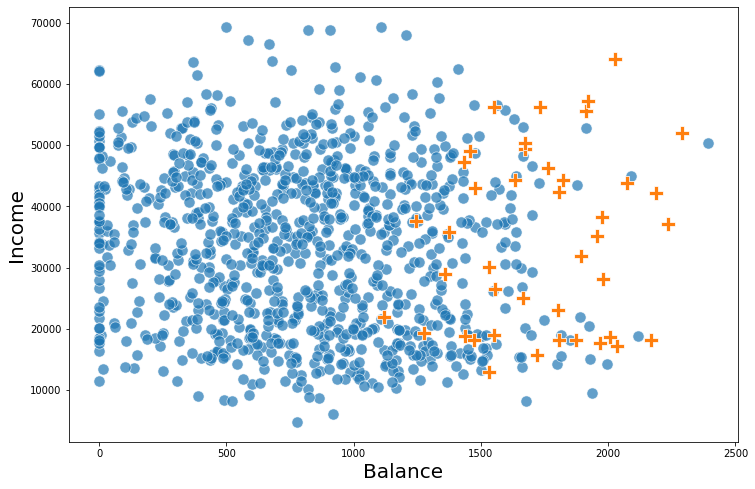

In [6]:
df = default.sample(1000, random_state=42)

is_default = df[df['y'] == 1]
not_default = df[df['y'] == 0]
plt.figure(figsize=(12, 8))
# plt.scatter(is_default['balance'], is_default['income'], alpha=1, s=100,
#             c='red', marker='P')

# plt.scatter(not_default['balance'], not_default['income'], alpha=0.5, s=100,
#             c='blue', marker='o')
sns.scatterplot(x=not_default['balance'], y=not_default['income'], marker='o', s=125, alpha=0.7)
sns.scatterplot(x=is_default['balance'], y=is_default['income'], marker='P', s=200)

plt.xlabel('Balance', fontsize=20)
plt.ylabel('Income', fontsize=20);

### Which of these two features would you choose to split the classes? Why?

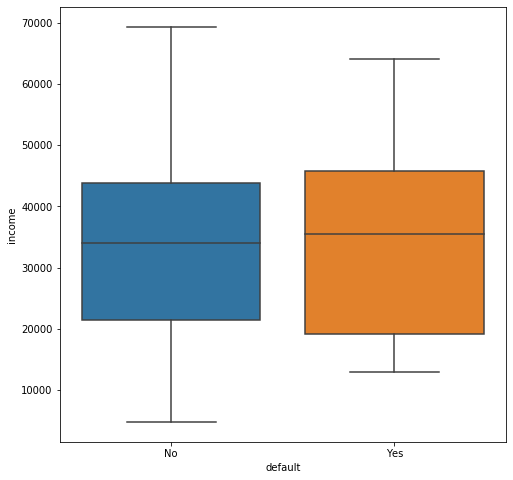

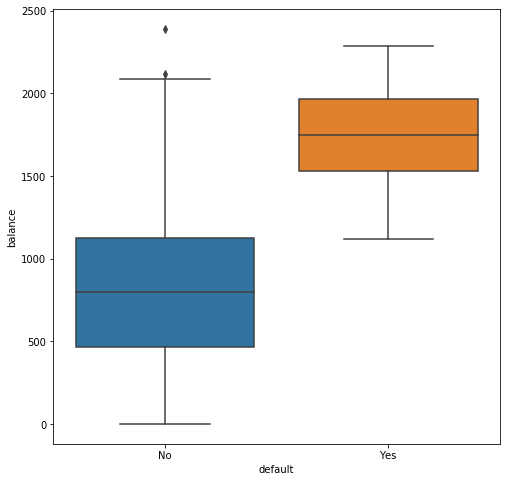

In [7]:
plt.figure(figsize=(8, 8))
sns.boxplot(x=df['default'], y=df['income'])
plt.figure(figsize=(8, 8))
sns.boxplot(x=df['default'], y=df['balance']);

In [8]:
df['is_student'] = df['student'].map({'Yes': 1, 'No': 0})

In [9]:
df = df[['balance', 'income', 'is_student', 'y']]
df.corr() # is student any good?

,balance,income,is_student,y
balance,1.000000,-0.091793,0.144877,0.389120
income,-0.091793,1.000000,-0.747246,0.018026
is_student,0.144877,-0.747246,1.000000,-0.003808
y,0.389120,0.018026,-0.003808,1.000000


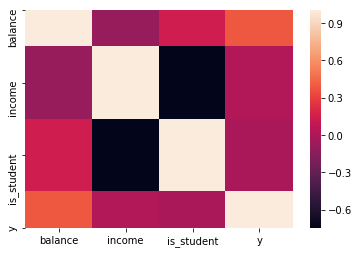

In [10]:
sns.heatmap(df.corr());

In [11]:
# Look at the full dataset
default['is_student'] = default['student'].map({'Yes': 1, 'No': 0})
tmp = default[df.columns]
tmp.corr()

,balance,income,is_student,y
balance,1.000000,-0.152243,0.203578,0.350119
income,-0.152243,1.000000,-0.753985,-0.019871
is_student,0.203578,-0.753985,1.000000,0.035420
y,0.350119,-0.019871,0.035420,1.000000


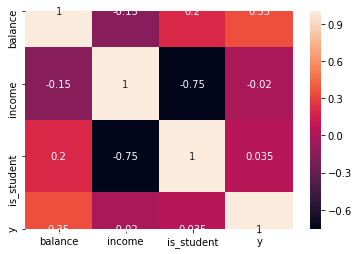

In [13]:
sns.heatmap(tmp.corr(), annot=True);

### Build a simple tree classifier

In [17]:
df['y_pred'] = (df['balance'] > 1300).astype(pd.np.int32)

In [18]:
df.head()

,balance,income,is_student,y,y_pred
6252,1435.662933,31507.089277,0,0,1
4684,771.789347,42139.070269,0,0,0
1731,0.000000,21809.218509,0,0,0
4742,113.571264,32803.832648,0,0,0
4521,1358.132472,49903.597081,0,0,1


In [19]:
df['y_pred']

6252    1
4684    0
1731    0
4742    0
4521    1
       ..
3921    1
6685    0
3194    0
1941    1
7713    0
Name: y_pred, Length: 1000, dtype: int32

### Is this model any good?

In [22]:
# Find the null accuracy
most_common = df['y'].value_counts().idxmax()
least_common = df['y'].value_counts().idxmin()
y_null = pd.np.ones(df.shape[0]) * most_common # What's going on here?
print(y_null[:10])
print(y_null.sum())
print(y_null.shape)
print(least_common)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0
(1000,)
1


In [28]:
metrics.accuracy_score(df['y'], df['y_pred'])

0.856

In [29]:
metrics.accuracy_score(df['y'], y_null)

0.958

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = default[['balance', 'income', 'is_student']]
y = default['y']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
y_pred = tree.predict(X_test)

In [34]:
metrics.accuracy_score(y_test, y_pred)

0.9592

In [35]:
metrics.roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])

0.6433900801103556

In [36]:
default.head()

,default,student,balance,income,y,is_student
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


In [37]:
default.groupby(['default'])['student'].value_counts()

default  student
No       No         6850
         Yes        2817
Yes      No          206
         Yes         127
Name: student, dtype: int64

In [38]:
from sklearn.ensemble.forest import RandomForestClassifier

In [39]:
rnd = RandomForestClassifier()
rnd.fit(X_train, y_train)
metrics.roc_auc_score(y_test, rnd.predict_proba(X_test)[:, 1])

/Users/jesserobles-alcaraz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8142898419696243

In [40]:
metrics.accuracy_score(y_test, rnd.predict(X_test))

0.962